In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df=pd.read_csv('Height-Weight Data.csv')

In [154]:
print(df)

         Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
3496  69.296830  185.649086
3497  70.542201  210.198845
3498  73.912549  202.429960
3499  67.396021  144.277671
3500  72.738970  187.222909

[3501 rows x 2 columns]


In [155]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [156]:





df.shape

(3501, 2)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [158]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


Text(0, 0.5, 'Weight')

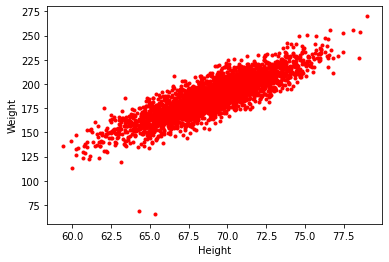

In [159]:
plt.scatter(df.Height, df.Weight, color="red", marker ='.')
plt.xlabel('Height')
plt.ylabel ('Weight')


In [160]:
df.Height.mean()

69.02441087268797

In [161]:
df.Weight.mean()

186.89125797946284

Text(0.5, 1.0, 'Your Chart Title')

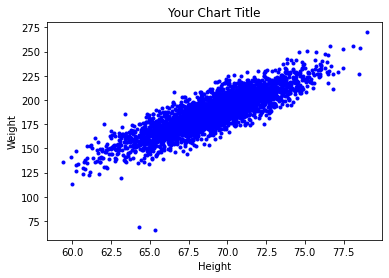

In [162]:
plt.scatter(df['Height'], df['Weight'], color='blue', marker='.')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Your Chart Title')

Text(0, 0.5, 'Weight')

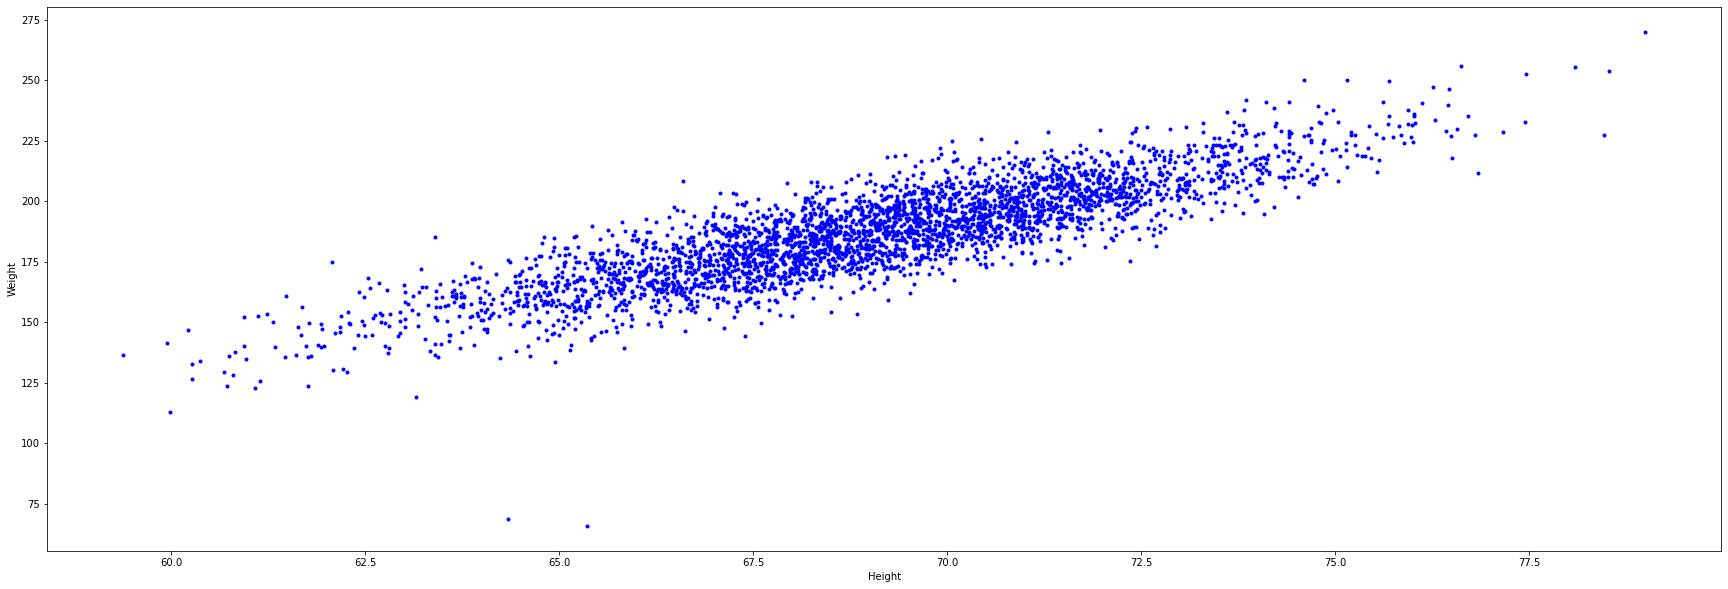

In [163]:
plt.figure(figsize=(30,10))
plt.scatter(df['Height'], df['Weight'], color='blue', marker='.')
plt.xlabel('Height')
plt.ylabel('Weight')



In [164]:
df.shape

(3501, 2)

In [165]:
x=df[['Height']]
y=df['Weight']

In [166]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [167]:
from sklearn.model_selection import train_test_split as tts


In [168]:
xtrain, xtest, ytrain, ytest = tts(x,y,train_size=.70, random_state=42) # random state for fixing the same date for each time. if random_state is not mentioned it will change the number randomly each time

In [169]:


xtrain.shape

(2450, 1)

In [170]:
xtrain.head()

,Height
1374,75.155410
231,71.968306
1769,69.963912
1812,66.475562
2658,72.731788


In [171]:
ytrain.head(10)

1374    214.370580
231     201.528177
1769    191.065448
1812    197.646409
2658    213.683943
1912    188.070801
1487    209.228854
3058    170.712230
3341    185.299377
2413    205.281493
Name: Weight, dtype: float64

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
lr= LinearRegression()

In [174]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [175]:
xtrain.shape

(2450, 1)

In [176]:
lr.coef_

array([5.95092905])

In [177]:
lr.intercept_

-224.00779357167542

In [178]:
m = lr.coef_
c = lr.intercept_

In [179]:
x=73
y=(m*x)+c

In [180]:
y

array([210.41002736])

In [181]:
lr.predict([[73]])

array([210.41002736])

In [182]:
lr.predict(df[['Height']])

array([215.45056555, 185.30843762, 217.01618578, ..., 215.84054261,
       177.0611446 , 208.85665635])

In [183]:
df['Predicted Weight']=lr.predict(df[['Height']]) # df['Predicted Weight'] means i added column in df=DataFrame

In [184]:
df

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.450566
1,68.781904,162.310473,185.308438
2,74.110105,212.740856,217.016186
3,71.730978,220.042470,202.858170
4,69.881796,206.349801,191.853816
...,...,...,...
3496,69.296830,185.649086,188.372725
3497,70.542201,210.198845,195.783842
3498,73.912549,202.429960,215.840543
3499,67.396021,144.277671,177.061145


In [185]:
testing=lr.predict(xtest)

In [186]:
testing


array([194.48982488, 176.32081659, 187.45296731, ..., 150.95895523,
       176.85907182, 179.03051912])

In [187]:
xtest.head()

,Height
211,70.324753
1454,67.271615
2176,69.142273
912,77.160801
921,72.676961


In [188]:
ytest.head()

211     193.346560
1454    182.898115
2176    175.832447
912     228.707301
921     217.561415
Name: Weight, dtype: float64

In [189]:
xtest['predict']=lr.predict(xtest) # xtest[''predict''] means column will be added to xtest column

In [190]:
xtest.head()

,Height,predict
211,70.324753,194.489825
1454,67.271615,176.320817
2176,69.142273,187.452967
912,77.160801,235.170658
921,72.676961,208.487646


In [191]:
xtest=xtest[['Height']]

In [192]:
from sklearn.metrics import mean_squared_error # mse
pred = lr.predict(xtest)
mse = mean_squared_error(ytest , pred) #testing error

In [193]:
mse

102.76672319484598

In [194]:
from sklearn.metrics import mean_absolute_error


In [195]:
mae=mean_absolute_error(ytest , pred)

In [196]:
mae

8.221025004936374

Text(0.5, 1.0, 'ML model')

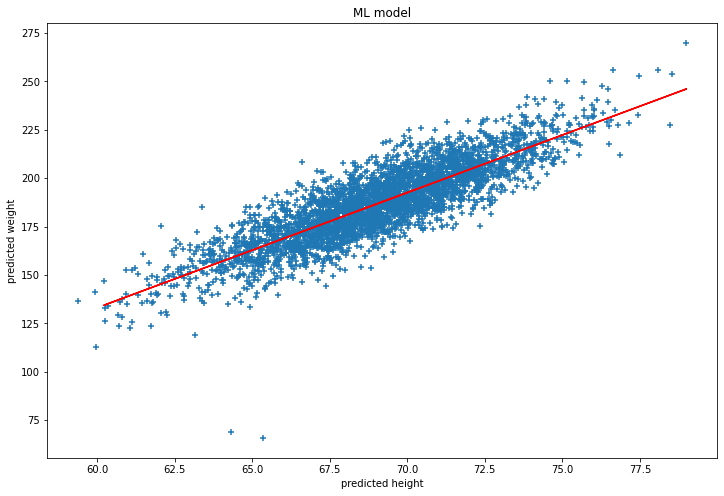

In [217]:

plt.figure(figsize=(12,8))
plt.scatter(df['Height'], df['Weight'],marker=('+'))
plt.plot(xtest,lr.predict(xtest), color='red')
plt.xlabel('predicted height')
plt.ylabel('predicted weight')
plt.title('ML model')



In [218]:
lr.score(xtest,ytest)

0.7331110657899205

In [222]:
lr.score(df[['Height']],df.Weight)

0.7323080468628174

In [223]:
lr.score(xtrain,ytrain)

0.731963334745727